<a href="https://colab.research.google.com/github/yash016/Plant_Disease_Classifier/blob/main/Plant_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries as shown below
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Plant_Disease/train'
valid_path = '/content/drive/MyDrive/Plant_Disease/test'

In [ ]:
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Plant_Disease/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Plant_Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Plant_Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 273s 4s/step - loss: 3.0468 - accuracy: 0.6394 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 2/20
61/61 [==============================] - 39s 634ms/step - loss: 0.6673 - accuracy: 0.8774 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 40s 647ms/step - loss: 0.6423 - accuracy: 0.9046 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 40s 654ms/step - loss: 0.5183 - accuracy: 0.9199 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 36s 594ms/step - loss: 0.4468 - accuracy: 0.9181 - val_loss: 3.5290e-04 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 33s 547ms/step - loss: 0.6396 - accuracy: 0.9196 - val_loss: 0.1407 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 33s 546ms/step - loss: 0.5466 - accuracy: 0.9266 - val_loss: 0.1045 - val_accuracy: 0.94

In [ ]:
import matplotlib.pyplot as plt

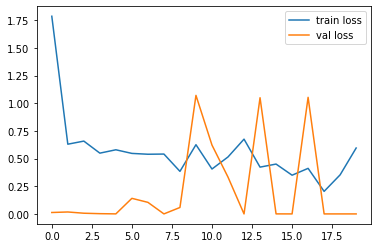

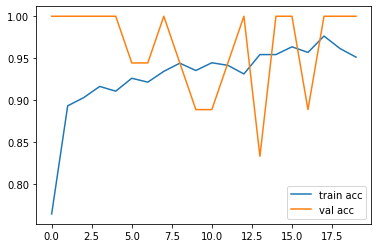

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inceptionv3.h5')

In [ ]:
model_save_name = 'model_inceptionv3.h5'
path = F"/content/drive/MyDrive/Plant_Disease/{model_save_name}" 
model.save(path)

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[2.79657691e-23, 2.54852182e-07, 1.37750762e-19, 9.99999762e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.99912914e-21],
       [3.10150674e-25, 1.31198044e-30, 1.00000000e+00, 2.22804222e-25],
       [2.14897170e-27, 1.86447873e-16, 1.00000000e+00, 9.64080741e-18],
       [6.39317301e-23, 9.99792755e-01, 1.88077165e-15, 2.07240286e-04],
       [1.11765219e-35, 1.00000000e+00, 5.61987282e-26, 8.11700315e-20],
       [2.63221792e-30, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.14532603e-14, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.91582145e-30, 8.55803969e-12, 2.80054113e-21],
       [0.00000000e+00, 1.00000000e+00, 3.50347716e-18, 1.41514296e-12],
       [1.28075145e-17, 8.49597248e-13, 1.38998801e-17, 1.00000000e+00],
       [9.39362926e-31, 4.35866987e-32, 5.29793525e-36, 1.00000000e+00],
       [1.16721324e-19, 2.91805473e-26, 1.00000000e+00, 2.39743789e-31],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e